## Lab 7: A/B Testing ##

In today's lab, we'll take a journey through A/B Testing

As usual, **run the cell below** to prepare the lab.

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Summary of A/B Testing and p-value
Imagine you have data from two different groups, and you want to compare their mean values. Simply finding the difference between their means isn't enough for statisticians. We need to determine if this difference could have occurred by chance.

To do this, we use A/B testing, along with a p-value.

* Null Hypothesis (H0): This assumes that the data from both groups come from the same underlying distribution. In this case, it shouldn't matter if we randomly permute the data, then compute the mean for each group again.
* Alternative Hypothesis (HA): This suggests that the data from the two groups come from different distributions.
* The p-value represents the probability of observing a difference as extreme as the one we've found (observed difference), assuming the null hypothesis is true.

Now, let's talk about how we calculate the p-value:

* One-tailed p-value: If we're only interested in whether the difference is greater than or less than observed difference, we calculate the probability of getting a difference as extreme or more extreme than the observed one, given the null hypothesis.

* Two-tailed p-value: If we're interested in both extremes (greater or less than observed difference), we calculate the probability of getting a difference as extreme as the observed one, regardless of the direction.

This process isn't limited to comparing means; it can be used with any test statistic (like median, percentage, etc.).

If the p-value is very low (typically below 0.05), we reject the null hypothesis and conclude that the groups likely come from different distributions. Otherwise, we fail to reject the null hypothesis.

## Deflategate ##

On January 18, 2015, the Indianapolis Colts and the New England Patriots played the American Football Conference (AFC) championship game to determine which of those teams would play in the Super Bowl. After the game, there were allegations that the Patriots' footballs had not been inflated as much as the regulations required; they were softer. This could be an advantage, as softer balls might be easier to catch.

For several weeks, the world of American football was consumed by accusations, denials, theories, and suspicions: the press labeled the topic Deflategate, after the Watergate political scandal of the 1970's. The National Football League (NFL) commissioned an independent analysis. In this example, we will perform our own analysis of the data.

Pressure is often measured in pounds per square inch (psi). NFL rules stipulate that game balls must be inflated to have pressures in the range 12.5 psi and 13.5 psi. Each team plays with 12 balls. Teams have the responsibility of maintaining the pressure in their own footballs, but game officials inspect the balls. Before the start of the AFC game, all the Patriots' balls were at about 12.5 psi. Most of the Colts' balls were at about 13.0 psi. However, these pre-game data were not recorded.

During the second quarter, the Colts intercepted a Patriots ball. On the sidelines, they measured the pressure of the ball and determined that it was below the 12.5 psi threshold. Promptly, they informed officials.
At half-time, all the game balls were collected for inspection. Two officials, Clete Blakeman and Dyrol Prioleau, measured the pressure in each of the balls.

Here are the data. Each row corresponds to one football. Pressure is measured in psi. The Patriots ball that had been intercepted by the Colts was not inspected at half-time. Nor were most of the Colts’ balls – the officials simply ran out of time and had to relinquish the balls for the start of second half play.


In [2]:
football = pd.read_csv('deflategate.csv')
football

,Team,Blakeman,Prioleau
0,Patriots,11.50,11.80
1,Patriots,10.85,11.20
2,Patriots,11.15,11.50
3,Patriots,10.70,11.00
4,Patriots,11.10,11.45
5,Patriots,11.60,11.95
6,Patriots,11.85,12.30
7,Patriots,11.10,11.55
8,Patriots,10.95,11.35
9,Patriots,10.50,10.90


#### Question 1 ####
For each of the 15 balls that were inspected, the two officials got different results. It is not uncommon that repeated measurements on the same object yield different results, especially when the measurements are performed by different people. So we will assign to each the ball the average of the two measurements made on that ball.

In [3]:
football['Combined'] = (football['Blakeman'] + football['Prioleau']) / 2
football

,Team,Blakeman,Prioleau,Combined
0,Patriots,11.50,11.80,11.650
1,Patriots,10.85,11.20,11.025
2,Patriots,11.15,11.50,11.325
3,Patriots,10.70,11.00,10.850
4,Patriots,11.10,11.45,11.275
5,Patriots,11.60,11.95,11.775
6,Patriots,11.85,12.30,12.075
7,Patriots,11.10,11.55,11.325
8,Patriots,10.95,11.35,11.150
9,Patriots,10.50,10.90,10.700


At a glance, it seems apparent that the Patriots' footballs were at a lower pressure than the Colts' balls. Because some deflation is normal during the course of a game, the independent analysts decided to calculate the drop in pressure from the start of the game. Recall that the Patriots' balls had all started out at about 12.5 psi, and the Colts' balls at about 13.0 psi. Therefore the drop in pressure for the Patriots' balls was computed as 12.5 minus the pressure at half-time, and the drop in pressure for the Colts' balls was 13.0 minus the pressure at half-time.

#### Question 2 ####

We can calculate the drop in pressure for each football by first setting up an array of the starting values. For this we will need an array consisting of 11 values each of which is 12.5, and another consisting of four values each of which is all 13. We will use the NumPy function np.ones, which takes a count as its argument and returns an array of that many elements, each of which is 1.

In [5]:
patriots_start = np.ones(11) * 12.5
colts_start = np.ones(4) * 13
start = np.append(patriots_start, colts_start)
start



array([12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5,
       13. , 13. , 13. , 13. ])

#### Question 3 ####

Let us calculate the drop in pressure for each football, which is the difference between the starting pressure and the combined pressure measurement.

In [6]:
drop = start - football['Combined']
football['Pressure Drop'] = drop
football

,Team,Blakeman,Prioleau,Combined,Pressure Drop
0,Patriots,11.50,11.80,11.650,0.850
1,Patriots,10.85,11.20,11.025,1.475
2,Patriots,11.15,11.50,11.325,1.175
3,Patriots,10.70,11.00,10.850,1.650
4,Patriots,11.10,11.45,11.275,1.225
5,Patriots,11.60,11.95,11.775,0.725
6,Patriots,11.85,12.30,12.075,0.425
7,Patriots,11.10,11.55,11.325,1.175
8,Patriots,10.95,11.35,11.150,1.350
9,Patriots,10.50,10.90,10.700,1.800


#### Question 4 ####

It looks as though the Patriots' drops were larger than the Colts'. Let's further calculate the average pressure drop in each of the two groups.

In [8]:
mean_psi_drop = football.groupby('Team')[['Pressure Drop']].mean()
mean_psi_drop

,Pressure Drop
Team,
Colts,0.468750
Patriots,1.202273


The average drop for the Patriots was about 1.2 psi compared to about 0.47 psi for the Colts.

The question now is why the Patriots' footballs had a larger drop in pressure, on average, than the Colts footballs. Could it be due to chance?

### The Hypotheses ###
How does chance come in here? Nothing was being selected at random. But we can make a chance model by hypothesizing that the 11 Patriots' drops look like a random sample of 11 out of all the 15 drops, with the Colts' drops being the remaining four. That's a completely specified chance model under which we can simulate data. So it's the **null hypothesis**.

For the alternative, we can take the position that the Patriots' drops are too large, on average, to resemble a random sample drawn from all the drops.

### Test Statistic ###

A natural statistic is the difference between the two average drops, which we will compute as "average drop for Patriots - average drop for Colts". Large values of this statistic will favor the alternative hypothesis.

#### Question 5 ####

Calculate the difference between the two average drops.

In [13]:
observed_means = mean_psi_drop['Pressure Drop']
observed_difference = observed_means[1] - observed_means[0]
observed_difference

0.733522727272728

This positive difference reflects the fact that the average drop in pressure of the Patriots' balls was greater than that of the Colts.

### Predicting the Statistic Under the Null Hypothesis ###
If the null hypothesis were true, then the Patriots' drops would be comparable to 11 drops drawn at random without replacement from all 15 drops, and the Colts' drops would be the remaining four.

#### Question 6 ####

We can simulate this by randomly permuting all 15 drops and assigning each team the appropriate number of permuted values. Let's do the simulutation and compare the average value

In [27]:
mean_psi_drop['Pressure Drop'][0]

0.46875

In [54]:
drops = football[['Pressure Drop']]
team_labels = football['Team']

shuffled_drops = drops.sample(len(drops), replace=False)['Pressure Drop'].values
shuffled_df_avg = pd.DataFrame({
    'Team': team_labels,
    'Pressure Drops': shuffled_drops}).groupby('Team')[['Pressure Drops']].mean()
original_and_shuffled = pd.DataFrame({
    'Team': ['Patriots', 'Colts'],
    'Original Avg Drop': [mean_psi_drop['Pressure Drop'][1], mean_psi_drop['Pressure Drop'][0]],
    'Shuffled Avg Drop': [shuffled_df_avg['Pressure Drops'][1], shuffled_df_avg['Pressure Drops'][0]]
})
original_and_shuffled

,Team,Original Avg Drop,Shuffled Avg Drop
0,Patriots,1.202273,1.120455
1,Colts,0.468750,0.693750


The two teams' average drop values are closer when the balls are randomly assigned to the two teams than they were for the balls actually used in the game.


### Permutation Test ###
It's time for a step that is now familiar. We will do repeated simulations of the test statistic under the null hypothesis, by repeatedly permuting the footballs and assigning random sets to the two teams.

#### Question 7 ####

We defined a function called `permuted_sample_average_difference` to do this. The code is based on the steps we took to compare the averages of the shuffled data. Use it to compute the average.

In [55]:
def permuted_sample_average_difference(df, value_column, group_column, repetitions = 10000):

    tbl = df[[group_column, value_column]]
    tbl_len = len(tbl.index)

    differences = []
    for i in np.arange(repetitions):
        shuffled = tbl.sample(tbl_len, replace = False)[value_column].reset_index(drop=True)
        original_and_shuffled = tbl.copy()
        original_and_shuffled['Shuffled Data'] = shuffled

        shuffled_means = original_and_shuffled.groupby(group_column).mean()['Shuffled Data']
        simulated_difference = shuffled_means.iloc[1] - shuffled_means.iloc[0]
        differences = np.append(differences, simulated_difference)

    return differences

In [58]:
differences = permuted_sample_average_difference(football, 
                                                 value_column='Pressure Drop', 
                                                 group_column='Team', 
                                                 repetitions=10000)
differences

array([-0.22102273,  0.66534091, -0.2125    , ...,  0.34147727,
        0.05170455, -0.19545455])

In [61]:
avg_differences = np.mean(differences)
avg_differences

0.0026553977272727267

### Conclusion of the Test ###
To calculate the empirical P-value, it's important to recall the alternative hypothesis, which is that the Patriots' drops are too large to be the result of chance variation alone.

The "direction of the alternative" is towards large drops for the Patriots, with correspondingly large values for out test statistic "Patriots' average - Colts' average". So the P-value is the chance (computed under the null hypothesis) of getting a test statistic equal to our observed value of 0.73352272727272805 or *larger*.

In [59]:
# You already calculated differences in Q7 and observed_difference in Q5.
empirical_P = np.count_nonzero(differences >= observed_difference) / 10000
empirical_P

0.0031

That's a pretty small P-value. Let's try to visualize this, here is the empirical distribution of the test statistic under the null hypothesis, with the observed statistic marked on the horizontal axis.

Observed Difference: 0.733522727272728
Empirical P-value: 0.0031


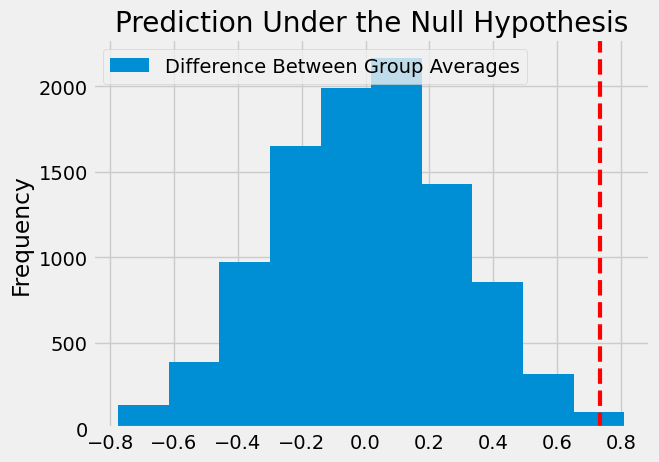

In [60]:
pd.DataFrame({'Difference Between Group Averages': differences}).plot.hist()
plt.axvline(x=observed_difference, color='red', linestyle='dashed', linewidth='3')
plt.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)
print('Empirical P-value:', empirical_P)

As in previous examples of this test, the bulk of the distribution is centered around 0. Under the null hypothesis, the Patriots' drops are a random sample of all 15 drops, and therefore so are the Colts'. Therefore the two sets of drops should be about equal on average, and therefore their difference should be around 0.

But the observed value of the test statistic is quite far away from the heart of the distribution. By any reasonable cutoff for what is "small", the empirical P-value is small. So we end up rejecting the null hypothesis of randomness, and conclude that the Patriots drops were too large to reflect chance variation alone.

The independent investigative team analyzed the data in several different ways, taking into account the laws of physics. The final report said,

> "[T]he average pressure drop of the Patriots game balls exceeded the average pressure drop of the Colts balls by 0.45 to 1.02 psi, depending on various possible assumptions regarding the gauges used, and assuming an initial pressure of 12.5 psi for the Patriots balls and 13.0 for the Colts balls."
>
> -- *Investigative report commissioned by the NFL regarding the AFC Championship game on January 18, 2015*

Our analysis shows an average pressure drop of about 0.73 psi, which is close to the center of the interval "0.45 to 1.02 psi" and therefore consistent with the official analysis.

Great job! :D You're finished with lab 7!

**Acknowledgement**: The materials for this lab are based on the [data8](http://data8.org/) course at UC Berkeley and [FuzzyWuzzy Using Python](https://www.neudesic.com/blog/fuzzywuzzy-using-python/).